In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x261f1b45e88>,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'prcp': 0.08}

In [11]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x261f1b74f08>,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0}

Exploratory Climate Analysis

In [12]:
from sqlalchemy import and_

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

time = session.query(Measurement).filter(and_(func.date(Measurement.date) >= '2016-08-23'),\
                                              func.date(Measurement.date) <= '2017-08-23')
for i in time:
    print(i.date, i.prcp)

2016-08-23 0.0
2016-08-24 0.08
2016-08-25 0.08
2016-08-26 0.0
2016-08-27 0.0
2016-08-28 0.01
2016-08-29 0.0
2016-08-30 0.0
2016-08-31 0.13
2016-09-01 0.0
2016-09-02 0.0
2016-09-03 0.0
2016-09-04 0.03
2016-09-05 None
2016-09-06 None
2016-09-07 0.05
2016-09-08 0.0
2016-09-09 0.03
2016-09-10 0.0
2016-09-11 0.05
2016-09-12 0.0
2016-09-13 0.02
2016-09-14 1.32
2016-09-15 0.42
2016-09-16 0.06
2016-09-17 0.05
2016-09-18 0.0
2016-09-19 0.0
2016-09-20 0.0
2016-09-21 0.0
2016-09-22 0.02
2016-09-23 0.0
2016-09-24 0.0
2016-09-25 0.0
2016-09-26 0.06
2016-09-27 0.02
2016-09-28 0.0
2016-09-29 0.0
2016-09-30 0.0
2016-10-01 0.0
2016-10-02 0.0
2016-10-03 0.0
2016-10-04 0.0
2016-10-05 0.0
2016-10-06 0.0
2016-10-07 0.0
2016-10-08 0.0
2016-10-09 0.0
2016-10-10 0.0
2016-10-11 0.0
2016-10-12 0.0
2016-10-13 0.0
2016-10-14 0.0
2016-10-15 0.0
2016-10-16 0.0
2016-10-17 0.01
2016-10-18 0.0
2016-10-19 0.0
2016-10-20 0.0
2016-10-21 0.05
2016-10-22 0.15
2016-10-23 0.01
2016-10-24 0.0
2016-10-25 0.03
2016-10-26 0.0
20

In [14]:
# Get the last date
ldate = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
ldate

'2017-08-23'

In [15]:
# Calculate the date 1 year ago from the last data point in the database 
l_date = dt.datetime.strptime(ldate, '%Y-%m-%d') - dt.timedelta(days=365)
l_date

datetime.datetime(2016, 8, 23, 0, 0)

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
session.query(func.sum(Measurement.prcp)).scalar()


2908.1299999999706

In [17]:
# Perform a query to retrieve the data and precipitation scores
result = session.query(Measurement.date, func.avg(Measurement.prcp)).filter(Measurement.date >= l_date).group_by(Measurement.date).all()
result

[('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 0.19499999999999998),
 ('2016-09-22', 

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(result, columns=['date', 'prcp'])
df.set_index('date', inplace=True)
df

,prcp
date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


In [25]:
# Sort the dataframe by date
df1 = df.sort_values(by='date')


<function matplotlib.pyplot.show(*args, **kw)>

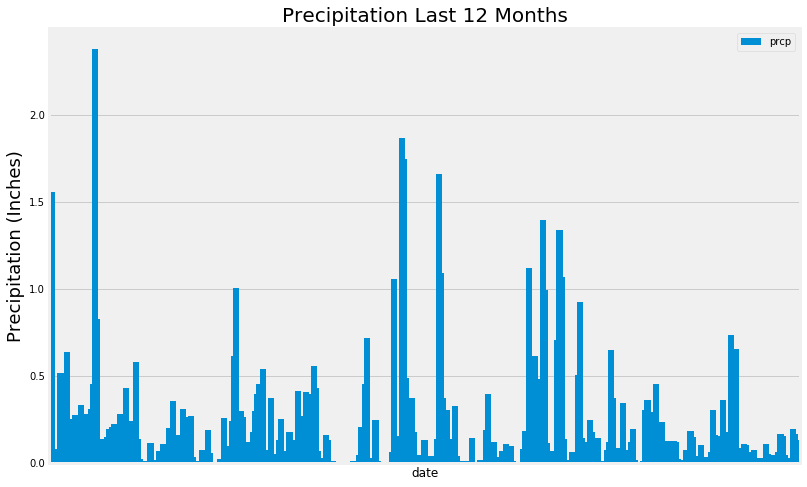

In [28]:
ax = df.plot(kind='bar', width=3, figsize=(12,8))
plt.locator_params(axis='x')
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.title("Precipitation Last 12 Months", size=20)
plt.ylabel("Precipitation (Inches)", size=18)
plt.xticks([])
plt.show

In [ ]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.station).count()


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
m_active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
           order_by(func.count(Measurement.station).desc()).all()
m_active

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.max(Measurement.tobs), func.avg(Measurement.tobs), func.min(Measurement.tobs).\
              filter(Measurement.station == 'USC00519281')).all()


In [ ]:
# Choose the station with the highest number of temperature observations.
#temp = session.query(Measurement.station, func.sum(Measurement.tobs)).group_by(Measurement.station).\
                   # order_by(func.count(Measurement.station).desc()).all()
#temp
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last = session.query(Measurement.tobs, Measurement.date).filter(Measurement.date>=l_date).\
                    filter(Measurement.station == 'USC00519281').all()

df2 = pd.DataFrame(last, columns=['temp', 'date'])

plt.hist(df2['temp'], bins=12)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

results = (calc_temps('2016-06-28', '2016-07-04'))
results

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
df3 = pd.DataFrame(results, columns=['temp_min', 'avg', 'temp_max'])
avg_temp = df3['avg']
min_max_temp = df3.iloc[0]['temp_max'] - df3.iloc[0]['temp_min']
avg_temp.plot(kind='bar', yerr=min_max_temp, figsize=(6,8), alpha=0.5, color ='coral')
plt.title("Trip Avg Temp", fontsize=20)
plt.ylabel("Temp (F)")
plt.xticks([])
plt.show()


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start = '2016-06-28'
end = '2016-07-04'
session.query(Station.station,Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
              filter(Measurement.station == Station.station).filter(Measurement.date >= start).\
              filter(Measurement.date<=end).group_by(Station.name).order_by(func.count(Measurement.station).desc()).all()

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
     
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date
start = '2016-06-28'
end = '2016-07-04'
normals=[]

dates = pd.date_range(start, end)
new_date = dates.strftime('%m-%d')

for i in new_date:
    normals.append(daily_normals(i)[0])
print(normals)

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df4 = pd.DataFrame(normals, columns=['temp_min', 'avg', 'temp_max'])
df4['date'] = dates
df4.set_index(['date'], inplace =True)
df4


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
df4.plot.area(stacked=False)
plt.ylabel("Temperatute")
plt.xlabel("Date")